# Set up

In [2]:
import numpy as np
import sys
import os
import glob
import importlib
import math as m
import pickle as pickle
import seaborn as sns
import statistics
import pandas as pd
fmts = ['svg','pdf']
from scipy.stats import norm, wilcoxon, ttest_rel, friedmanchisquare, shapiro,f_oneway,friedmanchisquare,rankdata
import statsmodels.stats.multitest as smm
from scipy import signal, fft
from scipy.optimize import curve_fit, minimize
import scipy.interpolate as interp
import matplotlib # produce matlab-style plots
from matplotlib import animation as ani # animation
import matplotlib.pyplot as plt # Matlab-style plotting
from matplotlib import rcParams
from matplotlib.lines import Line2D
from itertools import combinations
matplotlib.rc('font',**{'size':20}) # increase font size on plots
matplotlib.rc('text',usetex=False) # use LaTeX to render symbols
matplotlib.rc('animation',html='html5') # render animation
prop_cycle = plt.rcParams['axes.prop_cycle']
python_colors = prop_cycle.by_key()['color'] # python default color cycle

# auto reload modules
%load_ext autoreload
%autoreload 2
sys.path.append('C:\\Users\\amber\\Documents\\GitHub\\sensorimotor_fusion\\analysis\\Multimodal paper') # change this for your computer
# DATA_PATH = 'C:\\Users\\amber\\Documents\\GitHub\\sensorimotor_fusion' #change this for your computer

In [3]:
rcParams.update(matplotlib.rcParamsDefault)
# font = {#'family': 'serif', 'serif': ['Computer Modern'],
#         'weight' : 'ultralight',
#         'size'   : 14}
# matplotlib.rc('font', **font)
rcParams['axes.titlesize'] = 14
rcParams['font.size'] = 14
rcParams['font.weight'] = 'ultralight'
# rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'cm'
# rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'

In [4]:
from globalVars import *
from collect_data import findFilename, getrawdata, get_data, analyze
from analysis import *

c:\Users\amber\Documents\GitHub\sensorimotor_fusion\analysis\Multimodal paper\globalVars.py:29: RuntimeWarning: divide by zero encountered in true_divide
  soM = lambda s : 1/(s**2 + s) #2nd order machine
c:\Users\amber\Documents\GitHub\sensorimotor_fusion\analysis\Multimodal paper\globalVars.py:29: RuntimeWarning: invalid value encountered in true_divide
  soM = lambda s : 1/(s**2 + s) #2nd order machine


In [5]:
print('data length = ',N)
print('primes = ',primes)
print('base freq = ',base_freq)
print('IX = ',IX)
print('Even_IX = ',Even_IX)
print('Odd_IX = ',Odd_IX)
print('freqs = ',freqs)
print('omegas = ',omegas)
print('T = ',T) # total time 40 seconds
print('t = ',t) # timestamps
print('fs = ',fs)
print('sample_period (dt)= ',dt)
print('xf = ',xf) # frequency domain x-axis, shape (N//2,)
print('Machine = ',M) # soM at stimulated freqs
print('scaleInput = ',scaleInput)
print('scaleOutputScreen = ',scaleOutputScreen)

data length =  2400
primes =  [ 2  3  5  7 11 13 17 19]
base freq =  0.05
IX =  [ 4  6 10 14 22 26 34 38]
Even_IX =  [ 6 14 26 38]
Odd_IX =  [ 4 10 22 34]
freqs =  [0.1  0.15 0.25 0.35 0.55 0.65 0.85 0.95]
omegas =  [0.62831853 0.9424778  1.57079633 2.19911486 3.45575192 4.08407045
 5.34070751 5.96902604]
T =  40
t =  [0.00000000e+00 1.66736140e-02 3.33472280e-02 ... 3.99666528e+01
 3.99833264e+01 4.00000000e+01]
fs =  60
sample_period (dt)=  0.016666666666666666
xf =  [0.0000e+00 2.5000e-02 5.0000e-02 ... 2.9925e+01 2.9950e+01 2.9975e+01]
Machine =  [-0.7169568 -1.14107219j -0.52958685-0.5619091j  -0.28840044-0.18360142j
 -0.17134712-0.0779164j  -0.07726649-0.02235881j -0.05656227-0.01384948j
 -0.03387172-0.00634218j -0.02730057-0.00457371j]
scaleInput =  0.04616974606700115
scaleOutputScreen =  0.25


# Load data

In [38]:
# with open('multimodal_data.pkl', 'wb') as file:
#     pickle.dump(ALLdata, file)

# Load the array from the file
with open('multimodal_data.pkl', 'rb') as file:
    Rs,Ds,MDs,Us,U0s,U1s,Ys,rs,ds,mds,us,u0s,u1s,ys,errors,Tur,Tu0r,Tu1r,Tud,Tu0d,Tu1d,Tyr,Tyd,F,B,F0,F1,B0,B1 = pickle.load(file)

In [39]:
print(Rs.shape) # subject x condition x trial x all freqs
print(rs.shape) # subject x condition x trial x timestamps
print(errors.shape) # subject x condition x trial

subject_num = Rs.shape[0]
condition_num = Rs.shape[1]
trial_num = Rs.shape[2]
print('subject_num = ',subject_num)
print('condition_num (alphas) = ',condition_num)
print('trial_num = ',trial_num)
alphas = np.array([0,0.25,0.5,0.75,1])
# conditions = ['0','0.25','0.5','0.75','1']
conditions = ['0','25','50','75','100']
# conditions = ['0:1','1:3','1:1','3:1','1:0']
# conditions = ['0:1','1:3','1:1','3:1','1:0']

(15, 5, 14, 2400)
(15, 5, 14, 2400)
(15, 5, 14)
subject_num =  15
condition_num (alphas) =  5
trial_num =  14


# check data

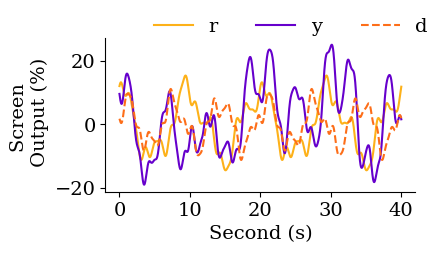

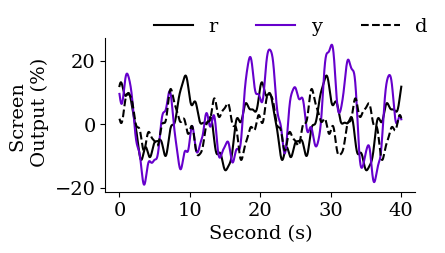

In [8]:
# example trial
fig,ax = plt.subplots(figsize=(4,2))
ax.plot(t,rs[0,0,-1,:]*100,label = 'r',color = colors['r'])
ax.plot(t,ys[0,0,-1,:]*100,label = 'y',color = colors['y'])
ax.plot(t,mds[0,0,-1,:]*100,linestyle = '--',label = 'd',color = colors['d'])
ax.set_ylabel('Screen \n Output (%)')
ax.set_xlabel('Second (s)')
ax.legend(bbox_to_anchor = (0.1,0.9), ncol=3, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

fig,ax = plt.subplots(figsize=(4,2))
ax.plot(t,rs[0,0,-1,:]*100,label = 'r',color = 'black')
ax.plot(t,ys[0,0,-1,:]*100,label = 'y',color = colors['y'])
ax.plot(t,mds[0,0,-1,:]*100,linestyle = '--',label = 'd',color = 'black')
ax.set_ylabel('Screen \n Output (%)')
ax.set_xlabel('Second (s)')
ax.legend(bbox_to_anchor = (0.1,0.9), ncol=3, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# fig,ax = plt.subplots(figsize=(4,2))
# ax.plot(t,us[0,0,-1,:]*100,label = 'u',color = colors['u'])
# ax.plot(t,ds[0,0,-1,:]*100,label = 'd',color = colors['d'])
# # plt.plot(t,mds[0,0,-2,:],label = 'md',color = colors['d'])
# ax.set_ylabel('input (%)')
# plt.legend()
# plt.show()

# Simuli

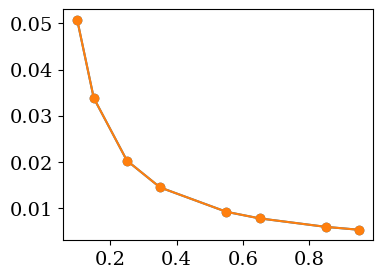

In [9]:
fig,ax = plt.subplots(figsize=(4,3))
Stimuli = np.zeros(IX.shape,dtype = complex)
Stimuli[::2] = Rs[0,0,-1,IX][::2] 
Stimuli[1::2] = Rs[0,0,-2,IX][1::2] 
ax.plot(freqs,np.abs(Stimuli),'-o')

Stimuli = np.zeros(IX.shape,dtype = complex)
Stimuli[1::2] = MDs[0,0,-1,IX][1::2] 
Stimuli[::2] = MDs[0,0,-2,IX][::2] 
ax.plot(freqs,np.abs(Stimuli),'-o')
plt.show()

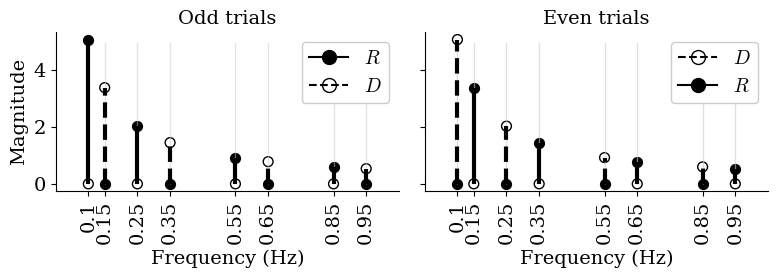

In [101]:
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
sub = 0
cond = 0

fig,axs = plt.subplots(1, 2,sharex = True,sharey = True,figsize=(8, 3)) 
ax = axs[0]
trial = 1
ax.vlines(freqs,ymin=-0.001, ymax=5,linewidth=1, color='0.8',alpha = 0.5)
R = np.abs( Rs[sub,cond,trial,IX]*100 )
D = np.abs( MDs[sub,cond,trial,IX]*100 )
ax.scatter(freqs,R, color='black',label=r'$R$_{odd}',s=50)
ax.scatter(freqs,D, color='black',label=r'$D_{even}$',facecolors='none',s=50)
ax.vlines(freqs,np.zeros((len(IX),)),R,color='black',linewidth = 3)
ax.vlines(freqs,np.zeros((len(IX),)),D,linestyles='--',color='black',linewidth = 3)
ax.set_xlim((0,21*base_freq))
# ax.set_ylim((-0.2,6))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90) 
legend_elements = [Line2D([0], [0], marker='o', color='black' ,label=r'$R$',markersize=10),
                   Line2D([0], [0], ls = '--',marker='o',color='black', label=r'$D$',markerfacecolor='none',markersize=10)]
ax.legend(handles=legend_elements, loc='upper right', ncol=1, frameon=True, prop={'size': 14},facecolor = 'white',framealpha = 1)
ax.set_title('Odd trials')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = axs[1]
trial = 0
ax.vlines(freqs,ymin=-0.001, ymax=5,linewidth=1, color='0.8',alpha = 0.6)
R = np.abs( Rs[sub,cond,trial,IX]*100 )
D = np.abs( MDs[sub,cond,trial,IX]*100 )
ax.scatter(freqs,R, color='black',label=r'$R$_{odd}',s=50)
ax.scatter(freqs,D, color='black',label=r'$D_{even}$',facecolors='none',s=50)
ax.vlines(freqs,np.zeros((len(IX),)),R,color='black',linewidth = 3)
ax.vlines(freqs,np.zeros((len(IX),)),D,linestyles='--',color='black',linewidth = 3)
ax.set_xlim((0,21*base_freq))
# ax.set_ylim((-0.2,6))
ax.set_xlabel('Frequency (Hz)')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90) 
legend_elements = [Line2D([0], [0], ls = '--', marker='o',color='black', label=r'$D$',markerfacecolor='none',markersize=10),
                   Line2D([0], [0], marker='o', color='black' ,label=r'$R$',markersize=10)]
ax.legend(handles=legend_elements, loc='upper right', ncol=1, frameon=True, prop={'size': 14},facecolor = 'white',framealpha = 1)
ax.set_title('Even trials')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
fig.savefig('stimuli.svg')
plt.show()

# Hypothesis 1

## Stats tests

Hypothesis: any of the conditions (25, 50, or 75) is better than condition 0 or condition 100. So six pairwise comparisons:
25 vs. 0
50 vs. 0
75 vs. 0
25 vs. 100
50 vs. 100
75 vs. 100

In [124]:
def stats_test(datas):
    # Compute residuals (observed - condition mean)
    residuals_0 = datas[0] - np.mean(datas[0])
    residuals_25 = datas[1] - np.mean(datas[1])
    residuals_50 = datas[2] - np.mean(datas[2])
    residuals_75 = datas[3] - np.mean(datas[3])
    residuals_100 = datas[4] - np.mean(datas[4])

    # Combine residuals from all conditions
    all_residuals = np.concatenate([residuals_0, residuals_25, residuals_50, residuals_75, residuals_100])

    # Perform Shapiro-Wilk test on residuals
    stat, p = shapiro(all_residuals)
    print(f'Shapiro-Wilk Test Statistic={stat:.4f}, p-value={p:.4f}')
    if p > 0.05:
        print("Residuals appear to be normally distributed (fail to reject H0).")
        stat, p = f_oneway(datas[0],datas[1],datas[2],datas[3],datas[4]) #see if p < 0.05, there is a significant difference
        print(f'One-way ANOVA Statistic={stat:.4f}, p-value={p:.4f}')
    else:
        print("Residuals are NOT normally distributed (reject H0).") 
         # Perform Friedman test
        stat, p = friedmanchisquare(datas[0],datas[1],datas[2],datas[3],datas[4])
        print(f'Friedman Test Statistic={stat:.4f}, p-value={p:.4f}') # If p < 0.05, there is a significant difference
        if p <= 0.05:
            print('Friedman Test: significant difference')
            # post hoc test with Wilcoxon signed-rank tests with Bonferroni correction
            comparisons = [
                ("0 vs. 100", datas[0], datas[4]),
                ("25 vs. 0", datas[1], datas[0]),
                ("50 vs. 0", datas[2], datas[0]),
                ("75 vs. 0", datas[3], datas[0]),
                ("25 vs. 100", datas[1], datas[4]),
                ("50 vs. 100", datas[2], datas[4]),
                ("75 vs. 100", datas[3], datas[4])
            ]
            p_values = []
            for name, cond1, cond2 in comparisons:
                stat, p = wilcoxon(cond1, cond2)
                p_values.append(p)
            # # Apply Bonferroni correction (dividing α by 6)
            # corrected_p_values = smm.multipletests(p_values, method='bonferroni')[1]
            # for (name, _, _), p_raw, p_corr in zip(comparisons, p_values, corrected_p_values):
            #     print(f'{name}: Raw p-value = {p_raw:.4f}, Bonferroni-corrected p-value = {p_corr:.4f}')

            # Apply Holm-Sidak Correction
            corrected_p_values = smm.multipletests(p_values, method='holm-sidak')[1]
            for (name, _, _), p_raw, p_corr in zip(comparisons, p_values, corrected_p_values):
                print(f'{name}: Raw p-value = {p_raw:.4f}, Holm-Sidak corrected p-value = {p_corr:.4f}')

        else:
            print('Friedman Test: no significant difference')

In [12]:
# if comparing every pairs (10 comarisons)

            # # post hoc test with Wilcoxon signed-rank tests with Bonferroni correction
            # pairs = list(combinations(range(len(datas)), 2))
            # p_values = []
            # pair_labels = []
            # for i, j in pairs:
            #     stat, p = wilcoxon(datas[i], datas[j])
            #     p_values.append(p)
            #     pair_labels.append(f"{conditions[i]} vs {conditions[j]}")

            # # Print uncorrected p-values
            # # for pair, p in zip(pair_labels, p_values):
            #     # print(f'Wilcoxon test {pair}: p-value={p:.4f}')

            # # Apply Bonferroni correction, divides the significance level (0.05) by the number of comparisons (10)
            # corrected_p_values = smm.multipletests(p_values, method='bonferroni')[1]

            # # Print Bonferroni-corrected p-values
            # print("\nBonferroni-Corrected P-values:")
            # for pair, p_corr in zip(pair_labels, corrected_p_values):
            #     print(f'{pair}: p-value={p_corr:.4f}')

## Performances

In [125]:
ALL = []
last_trials = trial_num - 5 # removing the first 5 trials 

### (1) time domain r-y

In [126]:
datas = []
for cond in range(condition_num):
    datas.append( np.mean((100*rs[:,cond,-last_trials:] - 100*ys[:,cond,-last_trials:])**2,axis = (1,2)) )#mean across all trials and timestamps
stats_test(datas)
ALL.append(datas)

Shapiro-Wilk Test Statistic=0.6412, p-value=0.0000
Residuals are NOT normally distributed (reject H0).
Friedman Test Statistic=14.5067, p-value=0.0058
Friedman Test: significant difference
0 vs. 100: Raw p-value = 0.2769, Holm-Sidak corrected p-value = 0.7265
25 vs. 0: Raw p-value = 0.0256, Holm-Sidak corrected p-value = 0.1440
50 vs. 0: Raw p-value = 0.0012, Holm-Sidak corrected p-value = 0.0081
75 vs. 0: Raw p-value = 0.1070, Holm-Sidak corrected p-value = 0.4321
25 vs. 100: Raw p-value = 0.8904, Holm-Sidak corrected p-value = 0.9616
50 vs. 100: Raw p-value = 0.2769, Holm-Sidak corrected p-value = 0.7265
75 vs. 100: Raw p-value = 0.8040, Holm-Sidak corrected p-value = 0.9616


### (2) performance at non-stim freqs

In [ ]:
datas = []
indices = np.setdiff1d(np.arange(0,40), IX) # non-stimulus freqs below 1hz
TF = 100*Ys[:,:,-last_trials:,indices] # R-Y below 1Hz, all freqs
for cond in range(condition_num):
    datas.append( np.mean((np.abs(TF[:,cond,:,:]))**2, axis = (1,2)) )#mean across all trials and freqs
stats_test(datas)
ALL.append(datas)

In [ ]:
# datas = []
# indices = IX #IX[:3] # non-stimulus freqs below 0.25hz 
# TF = 100*Rs[:,:,-last_trials:,indices] - 100*Ys[:,:,-last_trials:,indices] # R-Y below 0.25 Hz, all freqs
# for cond in range(condition_num):
#     datas.append( np.mean((np.abs(TF[:,cond,:,:]))**2, axis = (1,2)) )#mean across all trials and freqs
# stats_test(datas)
# ALL.append(datas)

### (2) reference tracking performance

In [ ]:
# Tyr - 1


Shapiro-Wilk Test Statistic=0.7915, p-value=0.0000
Residuals are NOT normally distributed (reject H0).
Friedman Test Statistic=18.8267, p-value=0.0009
Friedman Test: significant difference
0 vs. 100: Raw p-value = 0.0125, Holm-Sidak corrected p-value = 0.0724
25 vs. 0: Raw p-value = 0.0946, Holm-Sidak corrected p-value = 0.3280
50 vs. 0: Raw p-value = 0.0015, Holm-Sidak corrected p-value = 0.0106
75 vs. 0: Raw p-value = 0.0479, Holm-Sidak corrected p-value = 0.2177
25 vs. 100: Raw p-value = 0.4543, Holm-Sidak corrected p-value = 0.8375
50 vs. 100: Raw p-value = 0.8904, Holm-Sidak corrected p-value = 0.9766
75 vs. 100: Raw p-value = 0.8469, Holm-Sidak corrected p-value = 0.9766


### (3) freq domain, non-stimulated freqs

### (4) F-M^-1

In [129]:
datas = []
TF = F[:,:,-last_trials//2:,:3] - (M**(-1))[:3] # at stim below 0.25 Hz
for cond in range(condition_num):
    datas.append( np.mean((np.abs(TF[:,cond,:,:]))**2, axis = (1,2)) )#mean across all trials and freqs
stats_test(datas)
ALL.append(datas)

Shapiro-Wilk Test Statistic=0.6559, p-value=0.0000
Residuals are NOT normally distributed (reject H0).
Friedman Test Statistic=7.4667, p-value=0.1132
Friedman Test: no significant difference


### (5) Evaluate Feedback Model

In [130]:
def feedback_output(R,D,B): # for each trial, assuming perfect FF = M^-1, computer the output
    B_all = np.zeros(N,dtype = complex) # make B and M at all freqs
    B_all[IX] = B # B at stim freqs
    B_all[-IX] = np.conjugate(B_all[IX]) # at neg freqs

    Y = R + (M_all*D) / (1+M_all*B_all) # freq domain output
    y = np.real(np.fft.ifft(Y,axis=0)*N) # time domain y 
    return y 

In [131]:
# for each trial, computer FB error
FB_outputs = np.zeros((subject_num,condition_num,trial_num,N)) # make B and M at all freqs
for sub in range(subject_num):
    for cond in range(condition_num):
        for trial in range(trial_num):
            y = feedback_output(Rs[sub,cond,trial,:],Ds[sub,cond,trial,:],B[sub,cond,trial//2,:])
            FB_outputs[sub,cond,trial,:] = y
FB_outputs = np.array(FB_outputs)

In [132]:
datas = []
for cond in range(condition_num):
    datas.append( np.mean((100*rs[:,cond,-last_trials:] - 100*FB_outputs[:,cond,-last_trials:])**2,axis = (1,2)) )#mean across all trials and timestamps
stats_test(datas)
ALL.append(datas)

Shapiro-Wilk Test Statistic=0.6851, p-value=0.0000
Residuals are NOT normally distributed (reject H0).
Friedman Test Statistic=19.7867, p-value=0.0006
Friedman Test: significant difference
0 vs. 100: Raw p-value = 0.0103, Holm-Sidak corrected p-value = 0.0502
25 vs. 0: Raw p-value = 0.1205, Holm-Sidak corrected p-value = 0.4018
50 vs. 0: Raw p-value = 0.0004, Holm-Sidak corrected p-value = 0.0030
75 vs. 0: Raw p-value = 0.0012, Holm-Sidak corrected p-value = 0.0069
25 vs. 100: Raw p-value = 0.1205, Holm-Sidak corrected p-value = 0.4018
50 vs. 100: Raw p-value = 0.4543, Holm-Sidak corrected p-value = 0.7022
75 vs. 100: Raw p-value = 0.5614, Holm-Sidak corrected p-value = 0.7022


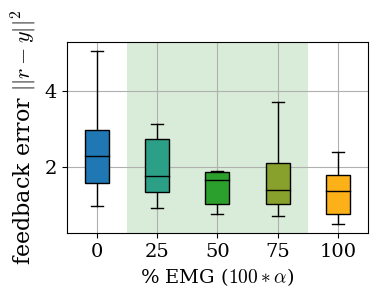

In [133]:
labels = conditions #slider : EMG
boxcolors = [colors['BLUE'],'#2ca086',colors['GREEN'],'#88a02c',colors['GOLD']]

fig,ax = plt.subplots(figsize=(4,3))
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
# ax.set_xlabel('Manual : EMG',fontsize = 14) #add x axis labels
ax.set_xlabel(r'% EMG ($100*\alpha$)',fontsize = 14) #add x axis labels
face0 = ax.axvspan(1.5,4.5, facecolor='green', alpha=0.15)
ax.set_ylabel(r'feedback error $||r-y||^2$',fontsize = 16) # add y axis label
ax.grid('on',zorder=-1)

# larger_value = np.max([np.percentile(datas[0], 90),np.percentile(datas[2], 90)]) # significant difference
# ax.plot([1,3], [larger_value-0.004,larger_value-0.004], color='black', lw=2)
# ax.text(2, larger_value-0.004, r'$*p<0.01$', ha='center', va='bottom', fontsize=13, color='black')

# larger_value = np.max([np.percentile(datas[2], 90),np.percentile(datas[4], 90)]) # significant difference
# ax.plot([3,5], [larger_value-0.004,larger_value-0.004], color='black', lw=2)
# ax.text(4.25, larger_value-0.004, r'$p = 0.07$', ha='center', va='bottom', fontsize=13, color='black')

# ax.set_title('average |R-Y| below crossover freqs (N = 15)')
plt.tight_layout()
# fig.savefig('example_sub1.svg')
plt.show()

### (6) phase margin & gain margin

In [134]:
#  phase margin of open loop TF L = BM
PM = np.zeros((subject_num,condition_num))
GM = np.zeros((subject_num,condition_num))
for sub in range(subject_num):
    for cond in range(condition_num):
        L = B[sub,cond,-last_trials:,2] * M[2] #all trial @ crossover freq (at 0.25Hz)
        PM[sub,cond] = np.mean(np.pi + np.angle(L)) #mean across trials
        GM[sub,cond] = np.mean(np.abs(L)) #mean across trials #in dB?
print(PM.shape)
stats_test([PM[:,0],PM[:,1],PM[:,2],PM[:,3],PM[:,4]])
ALL.append(datas)
print('\n')

# gain margin
stats_test([GM[:,0],GM[:,1],GM[:,2],GM[:,3],GM[:,4]])
ALL.append(datas)

(15, 5)
Shapiro-Wilk Test Statistic=0.8108, p-value=0.0000
Residuals are NOT normally distributed (reject H0).
Friedman Test Statistic=32.9067, p-value=0.0000
Friedman Test: significant difference
0 vs. 100: Raw p-value = 0.0256, Holm-Sidak corrected p-value = 0.1215
25 vs. 0: Raw p-value = 0.8469, Holm-Sidak corrected p-value = 0.9864
50 vs. 0: Raw p-value = 0.7615, Holm-Sidak corrected p-value = 0.9864
75 vs. 0: Raw p-value = 0.0256, Holm-Sidak corrected p-value = 0.1215
25 vs. 100: Raw p-value = 0.0015, Holm-Sidak corrected p-value = 0.0091
50 vs. 100: Raw p-value = 0.0001, Holm-Sidak corrected p-value = 0.0004
75 vs. 100: Raw p-value = 0.8040, Holm-Sidak corrected p-value = 0.9864


Shapiro-Wilk Test Statistic=0.9696, p-value=0.0682
Residuals appear to be normally distributed (fail to reject H0).
One-way ANOVA Statistic=0.4061, p-value=0.8037


## plot

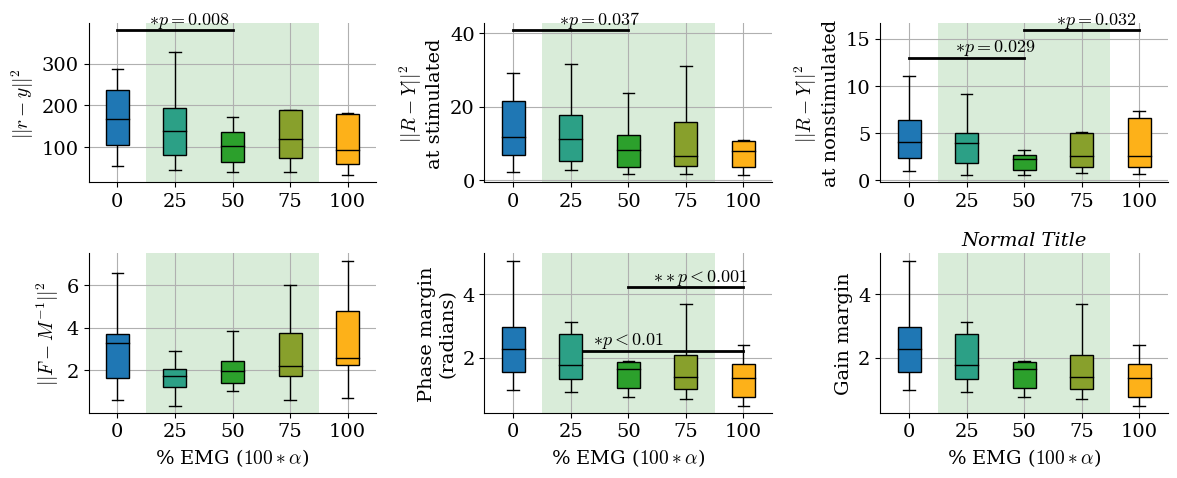

In [ ]:
labels = conditions #slider : EMG
boxcolors = [colors['BLUE'],'#2ca086',colors['GREEN'],'#88a02c',colors['GOLD']]

def boxplot(ax,datas):
    bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
    for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
        patch.set_facecolor(color)
    for median in bplot['medians']:
        median.set_color('black')
    face0 = ax.axvspan(1.5,4.5, facecolor='green', alpha=0.15)
    ax.grid('on',zorder=-1)

fig,axs = plt.subplots(2,3,figsize=(12,5))
ax = axs[0,0]
datas = ALL[0]
boxplot(ax,datas)
ax.set_ylabel(r'$||r-y||^2$',fontsize = 14)
larger_value = np.max([np.percentile(datas[0], 90),np.percentile(datas[2], 90)]) # significant difference
ax.plot([1, 3], [380,380], color='black', lw=2)
ax.text(2.25, 380, r'$*p=0.008$', ha='center', va='bottom', fontsize=13, color='black')


ax = axs[0,1]
datas = ALL[1]
boxplot(ax,datas)
ax.set_ylabel(r'$||R-Y||^2$''\n''at stimulated',fontsize = 14)
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
larger_value = np.max([np.percentile(datas[0], 90),np.percentile(datas[2], 90)]) # significant difference
ax.plot([1, 3], [larger_value-0.0005,larger_value-0.0005], color='black', lw=2)
ax.text(2.5, larger_value-0.0004, r'$*p=0.037$', ha='center', va='bottom', fontsize=13, color='black')

ax = axs[0,2]
datas = ALL[2]
boxplot(ax,datas)
ax.set_ylabel(r'$||R-Y||^2$''\n''at nonstimulated',fontsize = 14)
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
larger_value = np.max([np.percentile(datas[0], 90),np.percentile(datas[2], 90)]) # significant difference
ax.plot([1, 3], [13,13], color='black', lw=2)
ax.text(2.5, 13, r'$*p=0.029$', ha='center', va='bottom', fontsize=13, color='black')

# larger_value = np.max([np.percentile(datas[2], 90),np.percentile(datas[4], 90)]) # significant difference
ax.plot([3, 5], [larger_value-0.01,larger_value-0.01], color='black', lw=2)
ax.text(4.25, larger_value-0.01, r'$*p=0.032$', ha='center', va='bottom', fontsize=13, color='black')

ax = axs[1,0]
datas = ALL[3]
boxplot(ax,datas)
ax.set_ylabel(r'$||F-M^{-1}||^2$',fontsize = 14)
ax.set_xlabel(r'% EMG ($100*\alpha$)',fontsize = 14) #add x axis labels

ax = axs[1,1]
datas = ALL[4]
boxplot(ax,datas)
ax.set_ylabel('Phase margin''\n''(radians)',fontsize = 14)
ax.set_xlabel(r'% EMG ($100*\alpha$)',fontsize = 14) #add x axis labels
larger_value = np.max([np.percentile(datas[1], 90),np.percentile(datas[4], 90)]) # significant difference
ax.plot([2, 5], [larger_value-2,larger_value-2], color='black', lw=2)
ax.text(3, larger_value-2, r'$*p<0.01$', ha='center', va='bottom', fontsize=13, color='black')

larger_value = np.max([np.percentile(datas[2], 90),np.percentile(datas[4], 90)]) # significant difference
ax.plot([3, 5], [larger_value,larger_value], color='black', lw=2)
ax.text(4.25, larger_value, r'$**p<0.001$', ha='center', va='bottom', fontsize=13, color='black')

ax = axs[1,2]
datas = ALL[5]
boxplot(ax,datas)
ax.set_ylabel('Gain margin',fontsize = 14)
ax.set_xlabel(r'% EMG ($100*\alpha$)',fontsize = 14) #add x axis labels

for i in range(2):
    for j in range(3):
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].spines['right'].set_visible(False)

titles = ['feedback error','R-Y at stim freqs','R-Y at nonstim freqs','F-M^-1','Phase margin','Gain margin']
ax.set_title('Normal Title', fontstyle='italic')
plt.tight_layout()
# fig.savefig('performances.svg')
plt.show()

# Hypothesis 2

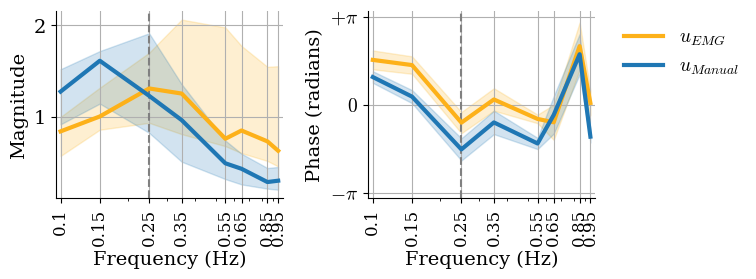

In [102]:
# population level for Even trials
# Bode plot of F and B
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
ylimphase = (-np.pi-0.2,np.pi+ 0.2)
yticksphase = [-np.pi,0.,np.pi]
yticklabelsphase = [r'$-\pi$',r'$0$',r'$+\pi$']

cond = 2
last_trials = 10
fig,axs = plt.subplots(1,2,sharex=True,figsize=(8,3))

# magnitude
ax = axs[0]
ax.axvline(x=0.25, color='grey', linestyle='--')
U0_mean = np.mean(np.abs(100*U0s[:,cond,-last_trials:,:][:,:,IX]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U0_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(freqs,q50,'-',label = 'EMG input',color = colors['GOLD'],linewidth = 3)
ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GOLD'])

U1_mean = np.mean(np.abs(100*U1s[:,cond,-last_trials:,:][:,:,IX]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U1_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(freqs,q50,'-',label = 'Manual input',color = colors['BLUE'],linewidth = 3)
ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['BLUE'])

# ax.plot(freqs, 100*np.abs((1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_xscale("log")
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.grid('on',zorder=-1)
# ax.set_ylim(0.1,80)
# ax.set_yscale("log")
ax.set_ylabel('Magnitude')
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# phase
ax = axs[1]
ax.axvline(x=0.25, color='grey', linestyle='--')
angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U0s[:,cond,-last_trials:,:][:,:,IX]))),axis = 1))
z = np.mean(np.exp(1j*(angles-np.pi/2)), axis=0)
mean = np.angle(z)+np.pi/2
disp = 1 - np.abs(z)
ax.plot(freqs,mean,'-',label = r'$u_{EMG}$',color = colors['GOLD'],linewidth = 3)
ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U1s[:,cond,-last_trials:,:][:,:,IX]))),axis = 1))
z = np.mean(np.exp(1j*(angles)), axis=0)
mean = np.angle(z)
disp = 1 - np.abs(z)
ax.plot(freqs,mean,'-',label = r'$u_{Manual}$',color = colors['BLUE'],linewidth = 3)
ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

# ax.plot(freqs, np.angle(100*(1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_ylabel('Phase (radians)') 
ax.grid('on',zorder=-1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.set_ylim(ylimphase)
ax.set_yticks(yticksphase)
ax.set_yticklabels(yticklabelsphase)
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(loc = 'lower left',frameon=False)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)
plt.tight_layout()
# fig.savefig('multimodal_inputs.svg')
plt.show()

## input at stimulated

In [157]:
# inputs at stimulated freqs
datas = []
# indices = np.arange(0,40) # freqs below 1Hz
TF = 100*Us[:,:,-last_trials:,IX]
for cond in range(condition_num):
    datas.append( np.mean((np.abs(TF[:,cond,:,:]))**2, axis = (1,2)) )#mean across all trials and freqs
stats_test(datas)
# ALL.append(datas)

Shapiro-Wilk Test Statistic=0.8750, p-value=0.0000
Residuals are NOT normally distributed (reject H0).
Friedman Test Statistic=8.7467, p-value=0.0678
Friedman Test: no significant difference


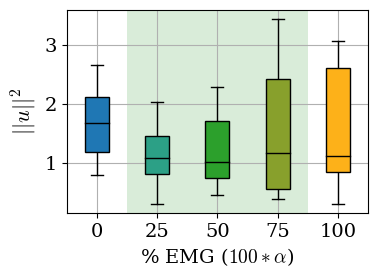

In [ ]:
labels = conditions #slider : EMG
boxcolors = [colors['BLUE'],'#2ca086',colors['GREEN'],'#88a02c',colors['GOLD']]

fig,ax = plt.subplots(figsize=(4,3))
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
# ax.set_xlabel('Manual : EMG',fontsize = 14) #add x axis labels
ax.set_xlabel(r'% EMG ($100*\alpha$)',fontsize = 14) #add x axis labels
face0 = ax.axvspan(1.5,4.5, facecolor='green', alpha=0.15)
ax.set_ylabel(r'$||u||^2$',fontsize = 16) # add y axis label
ax.grid('on',zorder=-1)
plt.tight_layout()
# fig.savefig('example_sub1.svg')
plt.show()

## non-stim inputs

In [161]:
# inputs at non-stimulated freqs
datas = []
indices = np.setdiff1d(np.arange(0,40), IX) # non-stimulus freqs below 1hz 
TF = 100*Us[:,:,-last_trials:,indices] 
for cond in range(condition_num):
    datas.append( np.mean((np.abs(TF[:,cond,:,:]))**2, axis = (1,2)) )#mean across all trials and freqs
stats_test(datas)
# ALL.append(datas)

Shapiro-Wilk Test Statistic=0.4860, p-value=0.0000
Residuals are NOT normally distributed (reject H0).
Friedman Test Statistic=28.1067, p-value=0.0000
Friedman Test: significant difference
0 vs. 100: Raw p-value = 0.0413, Holm-Sidak corrected p-value = 0.1551
25 vs. 0: Raw p-value = 0.0020, Holm-Sidak corrected p-value = 0.0100
50 vs. 0: Raw p-value = 0.0833, Holm-Sidak corrected p-value = 0.2295
75 vs. 0: Raw p-value = 0.6387, Holm-Sidak corrected p-value = 0.6387
25 vs. 100: Raw p-value = 0.0001, Holm-Sidak corrected p-value = 0.0004
50 vs. 100: Raw p-value = 0.0001, Holm-Sidak corrected p-value = 0.0004
75 vs. 100: Raw p-value = 0.3591, Holm-Sidak corrected p-value = 0.5893


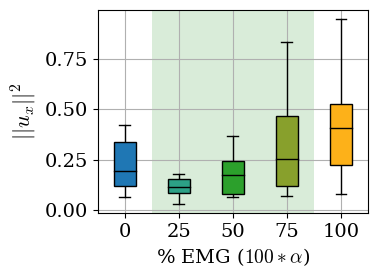

In [162]:
labels = conditions #slider : EMG
boxcolors = [colors['BLUE'],'#2ca086',colors['GREEN'],'#88a02c',colors['GOLD']]

fig,ax = plt.subplots(figsize=(4,3))
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
# ax.set_xlabel('Manual : EMG',fontsize = 14) #add x axis labels
ax.set_xlabel(r'% EMG ($100*\alpha$)',fontsize = 14) #add x axis labels
face0 = ax.axvspan(1.5,4.5, facecolor='green', alpha=0.15)
ax.set_ylabel(r'$||u_x||^2$',fontsize = 16) # add y axis label
ax.grid('on',zorder=-1)

# larger_value = np.max([np.percentile(datas[0], 90),np.percentile(datas[2], 90)]) # significant difference
# ax.plot([1,3], [larger_value-0.004,larger_value-0.004], color='black', lw=2)
# ax.text(2, larger_value-0.004, r'$*p<0.01$', ha='center', va='bottom', fontsize=13, color='black')

# larger_value = np.max([np.percentile(datas[2], 90),np.percentile(datas[4], 90)]) # significant difference
# ax.plot([3,5], [larger_value-0.004,larger_value-0.004], color='black', lw=2)
# ax.text(4.25, larger_value-0.004, r'$p = 0.07$', ha='center', va='bottom', fontsize=13, color='black')

# ax.set_title('average |R-Y| below crossover freqs (N = 15)')
plt.tight_layout()
# fig.savefig('example_sub1.svg')
plt.show()

# individual

In [105]:
avg_errors_slider = np.mean(errors[:,0,-10:],axis = 1) # slider only condition, last 4 trials
avg_errors_emg = np.mean(errors[:,4,-10:],axis = 1) # emg only condition, last 4 trials 
avg_errors_slider,avg_errors_emg

(array([ 35.62433228,  67.62653601,  33.79391584,  42.74228226,
        398.7174775 ,  16.33584601,  12.76561312,  40.80743136,
         21.77615783, 117.38331455,  23.76705301,  42.23285996,
         29.98181258, 110.51425493,  45.76572821]),
 array([ 21.9093186 , 319.70281212, 107.66276472,  23.31294693,
        287.51735259,  10.65559971,  13.91675751,  44.71628422,
          7.9101453 , 138.86865455,  13.02092415,  20.41523105,
         23.31573083,  43.54697506,  13.77337622]))

In [107]:
avg_errors_slider - avg_errors_emg

array([  13.71501369, -252.07627611,  -73.86884888,   19.42933532,
        111.20012491,    5.6802463 ,   -1.1511444 ,   -3.90885286,
         13.86601253,  -21.48534   ,   10.74612886,   21.81762891,
          6.66608174,   66.96727988,   31.99235198])

In [108]:
# find who is better at which modality
slider_experts = []
emg_experts = []
for sub in range(subject_num):
    diff = avg_errors_emg[sub] - avg_errors_slider[sub]
    if diff > 0 :
        slider_experts.append(sub)
    elif diff < 0 :
        emg_experts.append(sub)
slider_experts = np.array(slider_experts)
emg_experts = np.array(emg_experts)
# slider_experts = np.argsort(avg_errors_slider)[:5]
# emg_experts = np.argsort(avg_errors_emg)[:5]
slider_experts_num = len(slider_experts)
emg_experts_num = len(emg_experts)

print('slider experts = ',slider_experts)
print('emg experts = ',emg_experts)


slider experts =  [1 2 6 7 9]
emg experts =  [ 0  3  4  5  8 10 11 12 13 14]


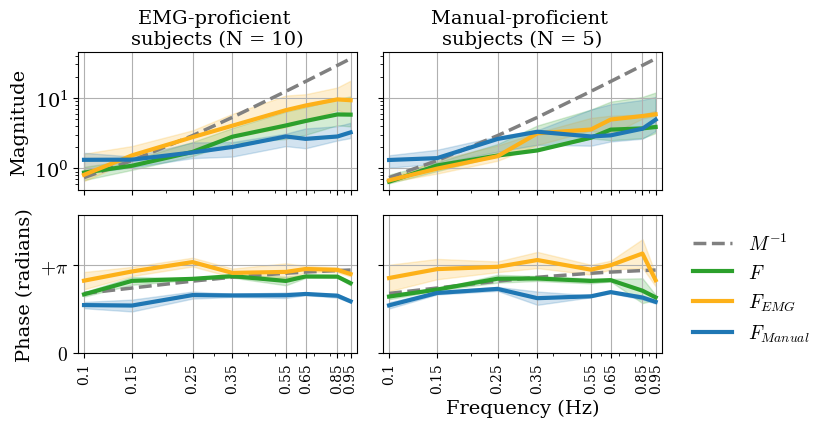

In [111]:
# Bode plot of F and B
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
ylimphase = (0, np.pi+1.8)
yticksphase = [0.,np.pi]
yticklabelsphase = [r'$0$',r'$+\pi$']
TFlabels = ['F','B','F0','F1','B0','B1']
last_few_trials = 7 # cross trials (N//2)

for cond in [2]:
    fig,axs = plt.subplots(2,2,sharex = 'col', sharey = 'row',figsize=(8.5,4.5))

    for i,sub in enumerate([emg_experts,slider_experts]):
        # magnitude
        ax = axs[0,i]
        ax.plot(freqs,np.abs(1/M),'--',color= 'grey',label = r'Machine inverse $M^{-1}$',linewidth = 2.5)
        
        mean = np.mean(np.abs(F[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
        q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
        ax.plot(freqs,q50,'-',label = 'Feedforward (combined)',color = colors['GREEN'],linewidth = 3)
        ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GREEN'])

        mean = np.mean(np.abs(F0[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
        q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
        ax.plot(freqs,q50,'-',label = 'Feedforward (EMG pathway)',color = colors['GOLD'],linewidth = 3)
        ax.fill_between(freqs, q25, q75, alpha=0.2, color=colors['GOLD'])

        mean = np.mean(np.abs(F1[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
        q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
        ax.plot(freqs,q50,'-',label = 'Feedforward (Manual pathway)',color = colors['BLUE'],linewidth = 3)
        ax.fill_between(freqs, q25, q75, alpha=0.2, color=colors['BLUE'])

        ax.set_xscale("log")
        ax.set_xlim(xlim)
        ax.grid('on',zorder=-1)
        # ax.set_ylim(0.1,80)
        ax.set_yscale("log")
        
        # phase
        ax = axs[1,i]
        ax.plot(freqs,np.angle(1/M),'--',color= 'grey',label = r'$M^{-1}$',linewidth = 2.5)

        angle = np.angle(np.mean(np.exp(1j*(np.angle(F[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
        z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0) #mean across subjects
        mean = np.angle(z)+np.pi/2
        disp = 1 - np.abs(z)
        ax.plot(freqs,mean,'-',label = r'$F$',color = colors['GREEN'],linewidth = 3)
        ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GREEN'])

        angle = np.angle(np.mean(np.exp(1j*(np.angle(F0[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
        z = np.mean(np.exp(1j*(angle-np.pi)), axis=0) #mean across subjects
        mean = np.angle(z)+np.pi
        disp = 1 - np.abs(z)
        ax.plot(freqs,mean,'-',label = r'$F_{EMG}$',color = colors['GOLD'],linewidth = 3)
        ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

        angle = np.angle(np.mean(np.exp(1j*(np.angle(F1[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
        z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0) #mean across subjects
        mean = np.angle(z)+np.pi/2
        disp = 1 - np.abs(z)
        ax.plot(freqs,mean,'-',label = r'$F_{Manual}$',color = colors['BLUE'],linewidth = 3)
        ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

        ax.grid('on',zorder=-1)
        ax.set_ylim(ylimphase)
        ax.set_yticks(yticksphase)
        ax.set_yticklabels(yticklabelsphase)

        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks,rotation=90,fontsize = 10) 
    axs[1,1].set_xlabel('Frequency (Hz)')
    axs[0,0].set_ylabel('Magnitude')
    axs[1,0].set_ylabel('Phase (radians)')
    # axs[1,1].legend(loc='lower right', ncol = 2,fontsize = 15)
    axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False,fontsize = 14)
    axs[0,0].set_title('EMG-proficient ''\n''subjects (N = '+str(emg_experts_num)+')',fontsize = 14)
    axs[0,1].set_title('Manual-proficient ''\n''subjects (N = '+str(slider_experts_num)+')',fontsize = 14)
    # axs[0,2].set_title('Both-proficient ''\n''subjects (N = '+str(both_experts_num)+')',fontsize = 14)
    axs[0,1].get_shared_x_axes().join(axs[0,0], axs[0,1])
    # axs[0,2].get_shared_x_axes().join(axs[0,0], axs[0,1])

    plt.tight_layout()
    # fig.savefig('group_subjects.svg')
    plt.show()

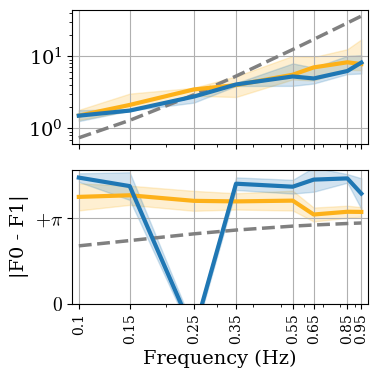

In [123]:
# Bode plot of F and B
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
ylimphase = (0, np.pi+1.8)
yticksphase = [0.,np.pi]
yticklabelsphase = [r'$0$',r'$+\pi$']
TFlabels = ['F','B','F0','F1','B0','B1']
last_few_trials = 7 # cross trials (N//2)

for cond in [2]:
    fig,axs = plt.subplots(2,1,sharex = 'col', sharey = 'row',figsize=(4,4))

    # for i,sub in enumerate([emg_experts,slider_experts]):
        
        # magnitude
    ax = axs[0]
    ax.plot(freqs,np.abs(1/M),'--',color= 'grey',label = r'Machine inverse $M^{-1}$',linewidth = 2.5)
    
    # mean = np.mean(np.abs(F[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
    # q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
    # ax.plot(freqs,q50,'-',label = 'Feedforward (combined)',color = colors['GREEN'],linewidth = 3)
    # ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GREEN'])
    sub = emg_experts
    mean = np.mean(np.abs(F0[sub,cond,-last_few_trials:,:] - F1[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
    q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
    ax.plot(freqs,q50,'-',label = 'Feedforward (EMG pathway)',color = colors['GOLD'],linewidth = 3)
    ax.fill_between(freqs, q25, q75, alpha=0.2, color=colors['GOLD'])

    sub = slider_experts
    mean = np.mean(np.abs(F0[sub,cond,-last_few_trials:,:] - F1[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
    q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
    ax.plot(freqs,q50,'-',label = 'Feedforward (EMG pathway)',color = colors['BLUE'],linewidth = 3)
    ax.fill_between(freqs, q25, q75, alpha=0.2, color=colors['BLUE'])

    # mean = np.mean(np.abs(F1[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
    # q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
    # ax.plot(freqs,q50,'-',label = 'Feedforward (Manual pathway)',color = colors['BLUE'],linewidth = 3)
    # ax.fill_between(freqs, q25, q75, alpha=0.2, color=colors['BLUE'])

    ax.set_xscale("log")
    ax.set_xlim(xlim)
    ax.grid('on',zorder=-1)
    # ax.set_ylim(0.1,80)
    ax.set_yscale("log")
        
    # phase
    ax = axs[1]
    # ax = axs[1,i]
    ax.plot(freqs,np.angle(1/M),'--',color= 'grey',label = r'$M^{-1}$',linewidth = 2.5)

    # angle = np.angle(np.mean(np.exp(1j*(np.angle(F[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
    # z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0) #mean across subjects
    # mean = np.angle(z)+np.pi/2
    # disp = 1 - np.abs(z)
    # ax.plot(freqs,mean,'-',label = r'$H$',color = colors['GREEN'],linewidth = 3)
    # ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GREEN'])
    sub = emg_experts
    angle = np.angle(np.mean(np.exp(1j*(np.angle(F0[sub,cond,-last_few_trials:,:] - F1[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
    z = np.mean(np.exp(1j*(angle-np.pi)), axis=0) #mean across subjects
    mean = np.angle(z)+np.pi
    disp = 1 - np.abs(z)
    ax.plot(freqs,mean,'-',label = r'$H_{EMG}$',color = colors['GOLD'],linewidth = 3)
    ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

    sub = slider_experts
    angle = np.angle(np.mean(np.exp(1j*(np.angle(F0[sub,cond,-last_few_trials:,:] - F1[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
    z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0) #mean across subjects
    mean = np.angle(z)+np.pi/2
    disp = 1 - np.abs(z)
    ax.plot(freqs,mean,'-',label = r'$H_{Manual}$',color = colors['BLUE'],linewidth = 3)
    ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

    ax.grid('on',zorder=-1)
    ax.set_ylim(ylimphase)
    ax.set_yticks(yticksphase)
    ax.set_yticklabels(yticklabelsphase)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks,rotation=90,fontsize = 10) 


    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('|F0 - F1|')
    # axs[1,0].set_ylabel('Phase (radians)')
    # # axs[1,1].legend(loc='lower right', ncol = 2,fontsize = 15)
    # axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False,fontsize = 14)
    # axs[0,0].set_title('EMG-proficient ''\n''subjects (N = '+str(emg_experts_num)+')',fontsize = 14)
    # axs[0,1].set_title('Manual-proficient ''\n''subjects (N = '+str(slider_experts_num)+')',fontsize = 14)
    # # axs[0,2].set_title('Both-proficient ''\n''subjects (N = '+str(both_experts_num)+')',fontsize = 14)
    # axs[0,1].get_shared_x_axes().join(axs[0,0], axs[0,1])
    # axs[0,2].get_shared_x_axes().join(axs[0,0], axs[0,1])

    plt.tight_layout()
    # fig.savefig('group_subjects.svg')
    plt.show()